In [1]:
#Predict for Fashion_Dataset
from keras.datasets import fashion_mnist
import cv2 as cv2
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import model_from_json
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import os
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Model
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Input,concatenate,GlobalAveragePooling2D,AveragePooling2D,Flatten,BatchNormalization
import math
from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model
from keras.datasets import cifar10
import cv2
from keras.utils import np_utils
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#---------------------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


4423680/4422102 [==============================] - 2s 0us/step
Loaded model from disk
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 70, 70, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 35, 35, 64)   3200        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 35, 35, 64)   256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 18, 18, 64)   0           batch_normalization_1[0][0]      
______

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


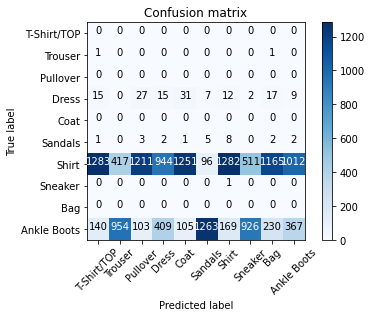

In [2]:
def load_fashion_mnist_data(img_rows, img_cols):
    
    (X_train,Y_train), (X_test, Y_test) = fashion_mnist.load_data()
    
    X_train = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_train[:,:,:]])
    X_test  = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_test[:,:,:]])
    #X_train = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_train[:,:,:,:]])
    #X_test  = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_test[:,:,:,:]])
    classes = np.unique(Y_train)
    nClasses = len(classes)
    X_train.shape, X_test.shape
    Y_train  = to_categorical(Y_train,nClasses)
    Y_test  = to_categorical(Y_test,nClasses)    
    
    X_train = X_train.astype('float16')
    X_test = X_test.astype('float16')
    X_train = X_train / 255.
    X_test = X_test  / 255.
    
    return X_train, Y_train, X_test, Y_test, nClasses
#---------------------------------------------------------------
def load_model(jsonfile,weightfiles):
    # load json and create model
    json_file = open(jsonfile, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(weightfiles)
    print("Loaded model from disk")
    return loaded_model
#----------------------------------------------
def plot_confusion_matrix(cm, classes_name,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    real = cm.copy()
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes_name))
    if classes_name is not None:
        plt.xticks(tick_marks, classes_name, rotation=45)
        plt.yticks(tick_marks, classes_name)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(real.shape[0]), range(real.shape[1])):
        plt.text(j, i, format(real[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#---------------------------------------------------------------
X_train, y_train, X_test, y_test, nClasses = load_fashion_mnist_data(70,70)
xdata = np.concatenate((X_train, X_test), axis=0)
ydata = np.concatenate((y_train, y_test), axis=0)
X_train,X_test,y_train,y_test = train_test_split(xdata, ydata, test_size=0.2, random_state=30 ,shuffle=True)
X_train = X_train.reshape(-1,70, 70, 1)   #Reshape for CNN -  should work!!
X_test = X_test.reshape(-1,70, 70, 1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
jsonfile = '/content/drive/My Drive/python/modelInceptionAux0_FashionMNIST 70 30 400.json'
weightfiles = '/content/drive/My Drive/python/model_weightsInceptionAux0_FashionMNIST 70 30 400.h5'
loaded_model = load_model(jsonfile,weightfiles)
loaded_model.summary()
[y_pred11, y_pred21, y_pred31] = loaded_model.predict(X_test)
y_pred11 = np.argmax((y_pred11),axis=1)
y_pred21 = np.argmax((y_pred21),axis=1)
y_pred31 = np.argmax((y_pred31),axis=1)
Ytest = np.argmax((y_test),axis=1)
acc = accuracy_score(Ytest, y_pred11)
prf = precision_recall_fscore_support(Ytest, y_pred11,average='macro')
print('X1 F1 = ', f1_score(Ytest, y_pred11, average="macro"))
print('X1 Precision = ', precision_score(Ytest, y_pred11, average="macro"))
print('X1 Recall = ', recall_score(Ytest, y_pred11, average="macro"))  
print('X1 Accuracy = ', accuracy_score(Ytest, y_pred11))

acc = accuracy_score(Ytest, y_pred21)
prf = precision_recall_fscore_support(Ytest, y_pred21,average='macro')
print('X2 F1 = ', f1_score(Ytest, y_pred21, average="macro"))
print('X2 Precision = ', precision_score(Ytest, y_pred21, average="macro"))
print('X2 Recall = ', recall_score(Ytest, y_pred21, average="macro"))  
print('X2 Accuracy = ', accuracy_score(Ytest, y_pred21))

acc = accuracy_score(Ytest, y_pred31)
prf = precision_recall_fscore_support(Ytest, y_pred31,average='macro')
print('X F1 = ', f1_score(Ytest, y_pred31, average="macro"))
print('X Precision = ', precision_score(Ytest, y_pred31, average="macro"))
print('X Recall = ', recall_score(Ytest, y_pred31, average="macro"))  
print('X Accuracy = ', accuracy_score(Ytest, y_pred31))

cm = confusion_matrix(y_pred31, Ytest)
classname = ["T-Shirt/TOP","Trouser","Pullover","Dress","Coat","Sandals","Shirt","Sneaker","Bag","Ankle Boots"]
plot_confusion_matrix(cm,classname)